In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [14]:
ratings = pd.read_csv("rating.csv")
anime = pd.read_csv("anime.csv")


In [15]:
print(ratings.head())
print(anime.head())

   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       355      -1
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262 

In [16]:
print(ratings.isnull().sum())
print(anime.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64
anime_id      0
name          0
genre        58
type         22
episodes      0
rating      210
members       0
dtype: int64


In [17]:
print(ratings["rating"].unique())

[-1 10  8  9  6  7  3  5  4  1  2]


In [18]:
df = ratings.merge(anime, on="anime_id", how="left")
print(df.head())

   user_id  anime_id  rating_x               name  \
0        1        20        -1             Naruto   
1        1        24        -1      School Rumble   
2        1        79        -1           Shuffle!   
3        1       226        -1         Elfen Lied   
4        1       355        -1  Shakugan no Shana   

                                               genre type episodes  rating_y  \
0  Action, Comedy, Martial Arts, Shounen, Super P...   TV      220      7.81   
1                   Comedy, Romance, School, Shounen   TV       26      8.06   
2  Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...   TV       24      7.31   
3  Action, Drama, Horror, Psychological, Romance,...   TV       13      7.85   
4  Action, Drama, Fantasy, Romance, School, Super...   TV       24      7.74   

    members  
0  683297.0  
1  178553.0  
2  158772.0  
3  623511.0  
4  297058.0  


In [19]:
print(df["rating_x"].describe())
print(df.shape)

count    7.266775e+06
mean     6.143682e+00
std      3.727943e+00
min     -1.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating_x, dtype: float64
(7266775, 9)


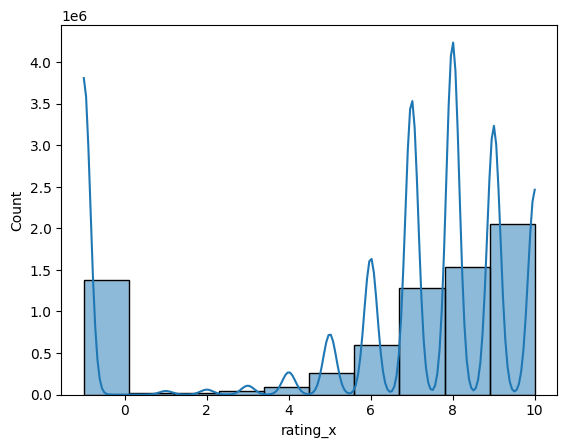

In [20]:
sns.histplot(df["rating_x"], bins=10, kde=True)
plt.show()

In [21]:
df = df[df["rating_x"] != -1]

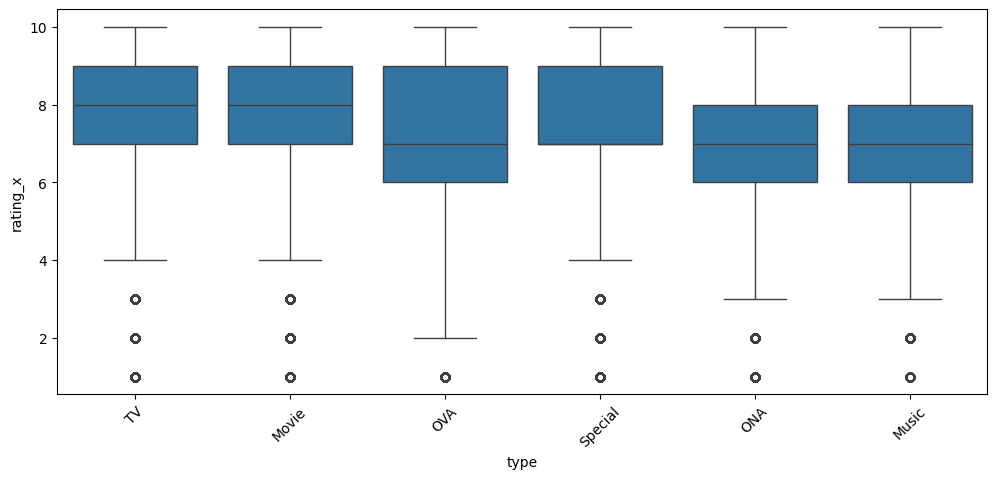

In [22]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["type"], y=df["rating_x"])
plt.xticks(rotation=45)
plt.show()

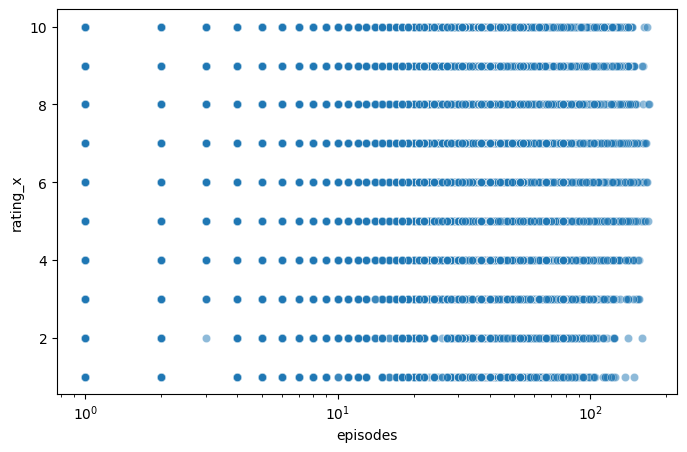

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["episodes"], y=df["rating_x"], alpha=0.5)
plt.xscale("log")
plt.show()

In [38]:
df = ratings.merge(anime, on="anime_id", how="left")
print(df.head())


   user_id  anime_id  rating_x               name  \
0        1        20        -1             Naruto   
1        1        24        -1      School Rumble   
2        1        79        -1           Shuffle!   
3        1       226        -1         Elfen Lied   
4        1       355        -1  Shakugan no Shana   

                                               genre type episodes  rating_y  \
0  Action, Comedy, Martial Arts, Shounen, Super P...   TV      220      7.81   
1                   Comedy, Romance, School, Shounen   TV       26      8.06   
2  Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...   TV       24      7.31   
3  Action, Drama, Horror, Psychological, Romance,...   TV       13      7.85   
4  Action, Drama, Fantasy, Romance, School, Super...   TV       24      7.74   

    members  
0  683297.0  
1  178553.0  
2  158772.0  
3  623511.0  
4  297058.0  


In [45]:
print(df['genre'].head())

0    Action, Comedy, Martial Arts, Shounen, Super P...
1                     Comedy, Romance, School, Shounen
2    Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...
3    Action, Drama, Horror, Psychological, Romance,...
4    Action, Drama, Fantasy, Romance, School, Super...
Name: genre, dtype: object


In [46]:
df['genre'] = df['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

df_expanded = df.explode('genre')

print(df_expanded['genre'].head())

0          Action
0          Comedy
0    Martial Arts
0         Shounen
0     Super Power
Name: genre, dtype: object


In [47]:
genre_avg_rating = df_expanded.groupby('genre')['rating_y'].mean().reset_index()

# Сортируем по рейтингу
genre_avg_rating = genre_avg_rating.sort_values(by='rating_y', ascending=False)

# Отображаем результат
print(genre_avg_rating)

            genre  rating_y
39       Thriller  8.128829
26        Samurai  7.980527
14          Josei  7.975512
19       Military  7.968804
12     Historical  7.915357
2            Cars  7.896713
24  Psychological  7.882886
23         Police  7.864954
21        Mystery  7.850539
36         Sports  7.843546
6           Drama  7.841169
4        Dementia  7.787598
38   Supernatural  7.772885
32        Shounen  7.768654
34  Slice of Life  7.764632
37    Super Power  7.747689
35          Space  7.737534
1       Adventure  7.733464
18          Mecha  7.729707
20          Music  7.720486
0          Action  7.712608
22         Parody  7.708864
5          Demons  7.705767
29         Seinen  7.683850
30         Shoujo  7.668246
28         Sci-Fi  7.660878
8         Fantasy  7.658542
27         School  7.632578
16          Magic  7.626356
25        Romance  7.624323
3          Comedy  7.608529
9            Game  7.596959
13         Horror  7.566910
33     Shounen Ai  7.539447
40        Vampire  7

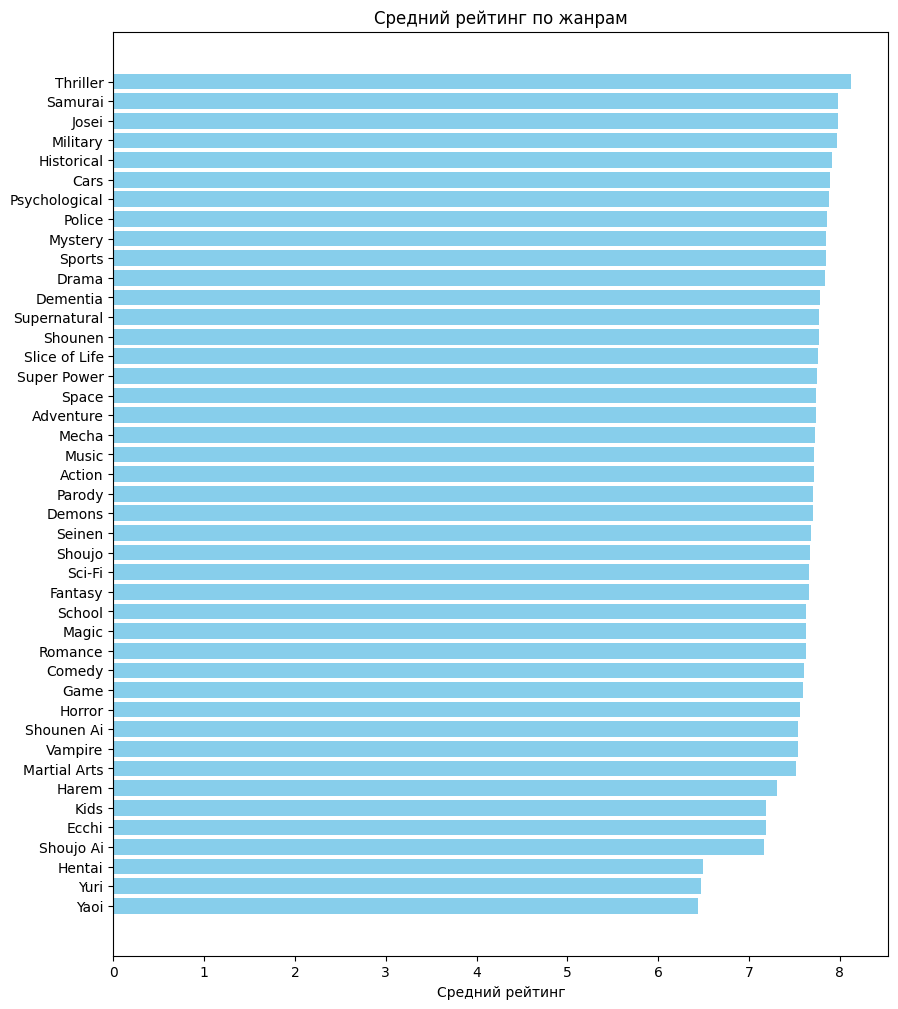

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))  # Увеличиваем размер, чтобы все влезло
plt.barh(genre_avg_rating['genre'], genre_avg_rating['rating_y'], color='skyblue')
plt.xlabel('Средний рейтинг')
plt.title('Средний рейтинг по жанрам')
plt.gca().invert_yaxis()  # Чтобы жанры с более высоким рейтингом были сверху
plt.show()

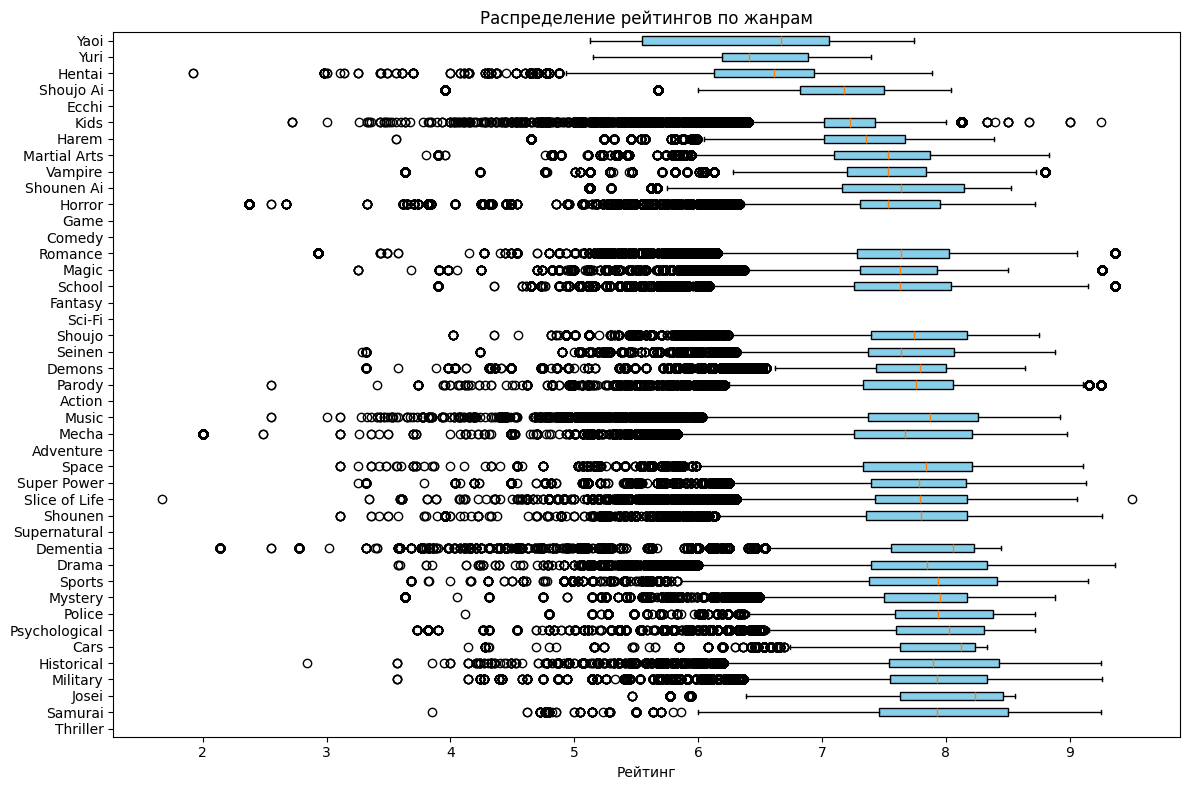

In [52]:
plt.figure(figsize=(12, 8))
plt.boxplot(
    [df_expanded[df_expanded['genre'] == genre]['rating_y'] for genre in genre_avg_rating['genre']], 
    tick_labels=genre_avg_rating['genre'],  # Обновленный параметр
    vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue')
)
plt.xlabel('Рейтинг')
plt.title('Распределение рейтингов по жанрам')
plt.tight_layout()
plt.show()

In [60]:
df = ratings.merge(anime, on="anime_id", how="left")

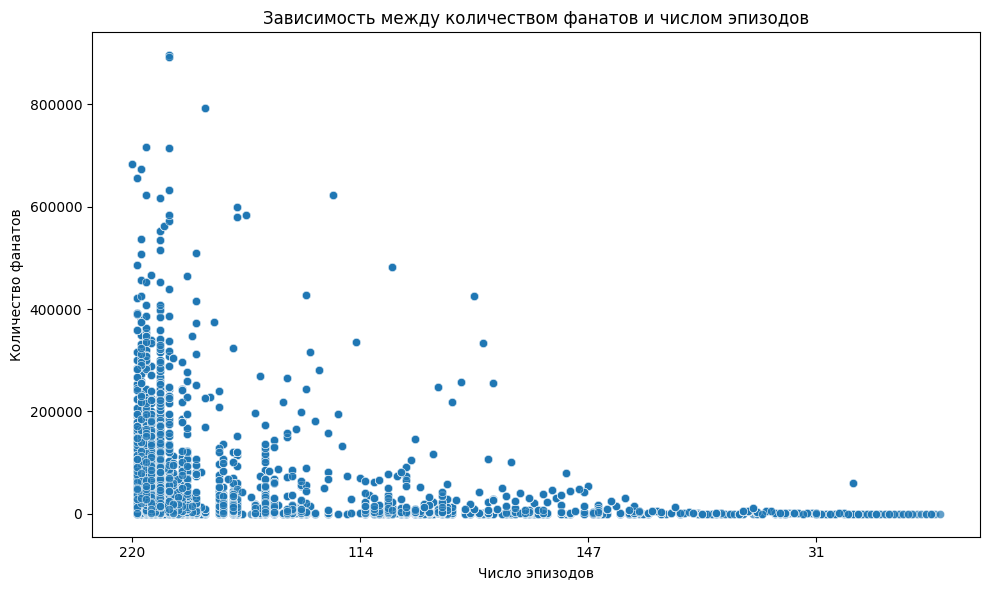

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='episodes', y='members', alpha=0.7)
plt.xlabel('Число эпизодов')
plt.ylabel('Количество фанатов')
plt.title('Зависимость между количеством фанатов и числом эпизодов')

# Устанавливаем шаг на оси X
plt.gca().xaxis.set_major_locator(MultipleLocator(50))  # шаг 50, можно изменить на нужный вам

plt.tight_layout()
plt.show()

In [62]:
df = ratings.merge(anime, on="anime_id", how="left")


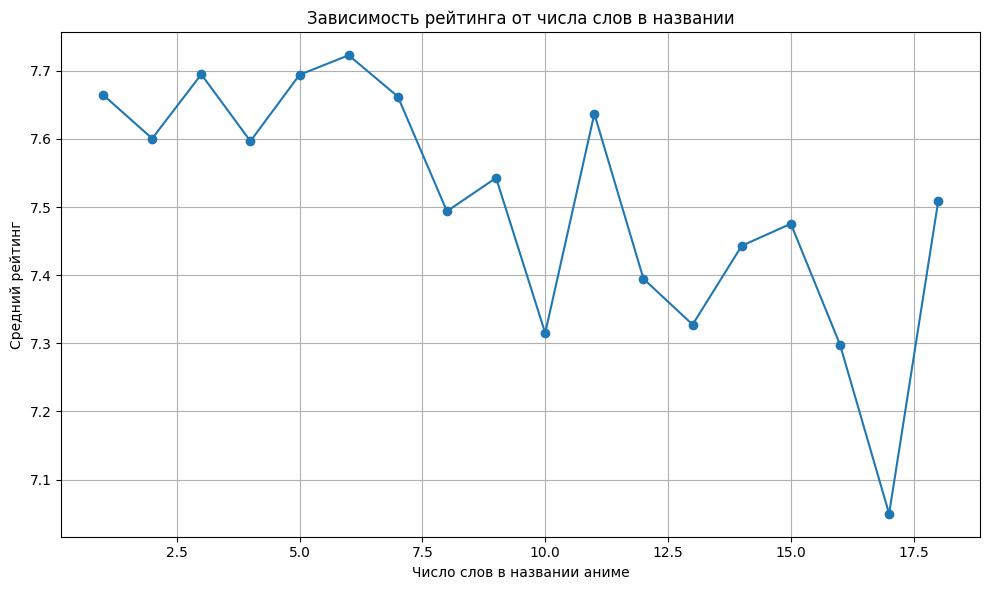

In [63]:
df['name'] = df['name'].fillna('')

# Считаем количество слов в названии
df['name_word_count'] = df['name'].apply(lambda x: len(x.split()))

# Группируем по количеству слов и считаем средний рейтинг
word_count_rating = df.groupby('name_word_count')['rating_y'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(word_count_rating['name_word_count'], word_count_rating['rating_y'], marker='o')
plt.xlabel('Число слов в названии аниме')
plt.ylabel('Средний рейтинг')
plt.title('Зависимость рейтинга от числа слов в названии')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\vvman\AppData\Local\Temp\ipykernel_1328\311178271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='name_word_count', y='rating_y', palette='pastel')


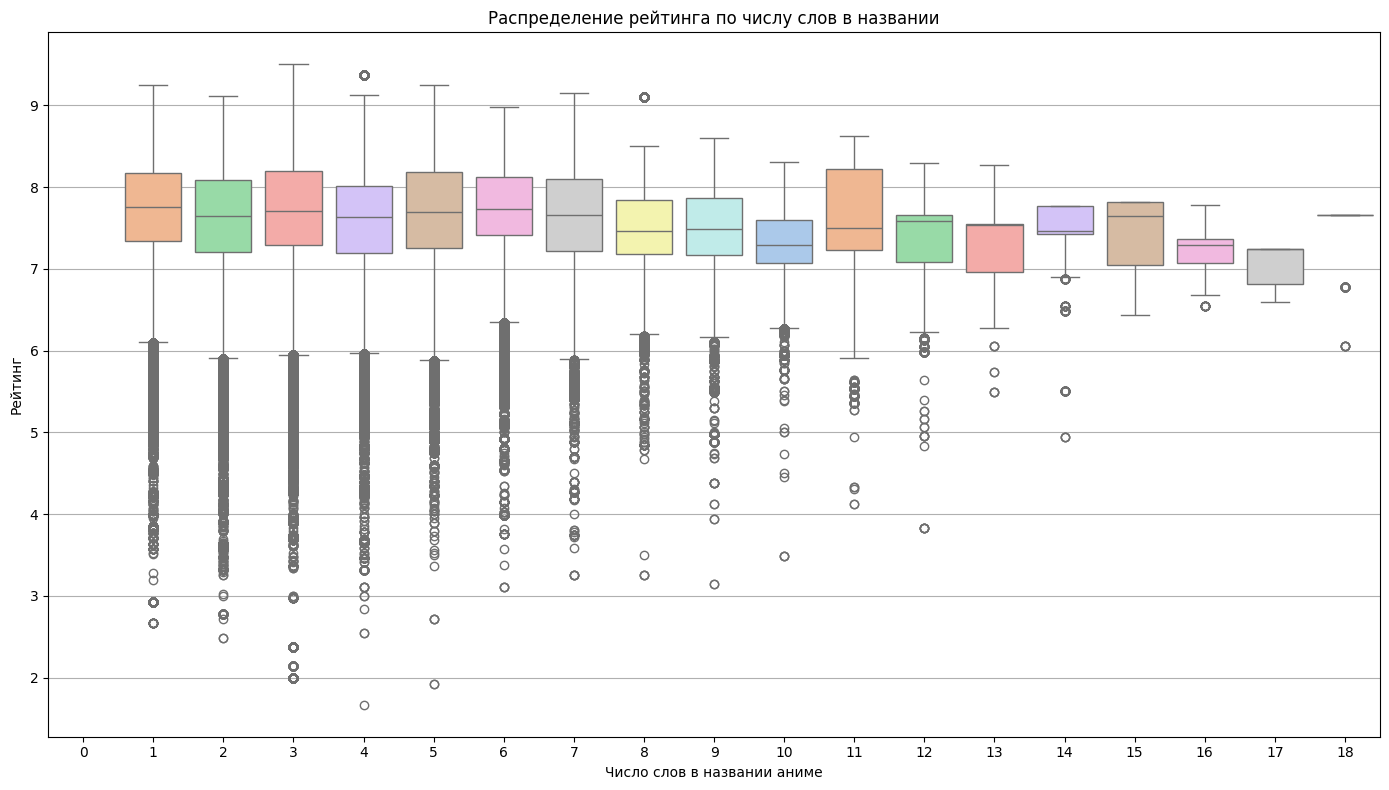

In [64]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='name_word_count', y='rating_y', palette='pastel')

plt.xlabel('Число слов в названии аниме')
plt.ylabel('Рейтинг')
plt.title('Распределение рейтинга по числу слов в названии')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()